In [23]:
# LOAN APPROVAL PREDICTION SYSTEM
!pip install pandas numpy matplotlib seaborn scikit-learn gradio joblib -q


# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import joblib
import gradio as gr
import plotly.express as px
import ipywidgets as widgets
from google.colab import output
output.enable_custom_widget_manager()
from IPython.display import display


In [24]:
# ================================
#  LOAD AND DISPLAY FULL DATASET
# ================================
FILE = "loan prediction dataset.csv"
df = pd.read_csv(FILE)
print(" Dataset Loaded Successfully!")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

print("\n--- DATA INFO ---")
print(df.info())

print("\n--- MISSING VALUES PER COLUMN ---")
print(df.isnull().sum())

# ================================
# DATA CLEANING & FEATURE SETUP
# ================================
eda = df.copy()
eda['Loan_Status_num'] = eda['Loan_Status'].map({'Approved': 1, 'Rejected': 0})

numeric_cols = ['Applicant_Income','Coapplicant_Income','Loan_Amount',
                'Loan_Term','Credit_History']
categorical_cols = ['Gender','Married','Dependents',
                    'Education','Employment_Status','Property_Area']
target_col = 'Loan_Status'

df = df[df[target_col].isin(['Approved','Rejected'])].copy()
print(" Data cleaning completed successfully.")

 Dataset Loaded Successfully!


,Loan_ID,Gender,Married,Dependents,Education,Employment_Status,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Credit_History,Property_Area,Age,Loan_Status
0,LN03437,Female,Yes,3,Graduate,Salaried,34473.91167,13914.721570,240732.45840,180,1,Semiurban,40.084028,Approved
1,LN04823,Female,Yes,1,Graduate,Self-Employed,59718.02068,18720.814790,122547.27840,180,1,Semiurban,47.243644,Approved
2,LN04186,Female,Yes,1,Not Graduate,Salaried,106981.51570,2229.154377,140550.93780,60,1,Rural,24.292070,Approved
3,LN00380,Male,Yes,2,Graduate,Salaried,43205.56316,35578.111770,146135.73810,120,1,Semiurban,38.742244,Approved
4,LN04698,Female,Yes,0,Graduate,Salaried,62526.28399,20212.157910,203408.05170,180,1,Semiurban,41.164721,Approved
5,LN00686,Male,Yes,0,Graduate,Salaried,55193.49204,9840.946869,26978.20890,240,1,Rural,38.590016,Approved
6,LN03978,Female,Yes,3,Graduate,Self-Employed,71362.06410,4873.144366,64638.70027,120,1,Urban,36.399731,Approved
7,LN04744,Female,No,0,Graduate,Salaried,92086.78217,31781.799220,81487.17054,120,0,Semiurban,30.352822,Rejected
8,LN01422,Male,No,2,Not Graduate,Self-Employed,52700.94541,3658.288547,118807.98760,180,1,Urban,34.940675,Approved
9,LN00381,Female,No,2,Graduate,Unemployed,48012.14709,615.888332,268723.31420,240,1,Semiurban,29.123910,Rejected



--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             3192 non-null   object 
 1   Gender              3115 non-null   object 
 2   Married             3126 non-null   object 
 3   Dependents          3192 non-null   int64  
 4   Education           3126 non-null   object 
 5   Employment_Status   3136 non-null   object 
 6   Applicant_Income    3157 non-null   float64
 7   Coapplicant_Income  3192 non-null   float64
 8   Loan_Amount         3151 non-null   float64
 9   Loan_Term           3192 non-null   int64  
 10  Credit_History      3192 non-null   int64  
 11  Property_Area       3192 non-null   object 
 12  Age                 3192 non-null   float64
 13  Loan_Status         3192 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 349.3+ KB
None

--- MISSING VALUES P

In [25]:
# ================================
#  TRAIN / TEST SPLIT
# ================================
numeric_cols = ['Applicant_Income','Coapplicant_Income','Loan_Amount',
                'Loan_Term','Credit_History']
categorical_cols = ['Gender','Married','Dependents',
                    'Education','Employment_Status','Property_Area']
target_col = 'Loan_Status'

X = df[numeric_cols + categorical_cols]
y = df[target_col].map({'Approved':1,'Rejected':0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split done successfully.")

# ================================
#  PREPROCESSING PIPELINE
# ================================
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, numeric_cols),
    ('cat', categorical_pipe, categorical_cols)
])

print("Preprocessing pipeline ready.")

Train-test split done successfully.
Preprocessing pipeline ready.


In [26]:
# The model saving code has been moved to the cell where the final model is trained (cell 1b423d9d).
# This cell is now empty as its functionality is redundant.

In [35]:
import gradio as gr
import pandas as pd
import joblib

# Load saved model pipeline
best_model = joblib.load("loan_model.pkl")
best_model_name = "Logistic Regression"

# -------------------------------
#  Prediction Function (with reasons + risk level in BLACK)
# -------------------------------
def predict_loan(Gender, Married, Dependents, Education, Self_Employed,
                 ApplicantIncome, CoapplicantIncome, LoanAmount,
                 Loan_Amount_Term, Credit_History, Property_Area):

    try:
        # 1. Convert input to DataFrame
        data = {
            "Applicant_Income": float(ApplicantIncome),
            "Coapplicant_Income": float(CoapplicantIncome),
            "Loan_Amount": float(LoanAmount),
            "Loan_Term": float(Loan_Amount_Term),
            "Credit_History": float(Credit_History),
            "Gender": Gender,
            "Married": Married,
            "Dependents": Dependents,
            "Education": Education,
            "Employment_Status": Self_Employed, # Renamed Self_Employed to Employment_Status
            "Property_Area": Property_Area,
        }
        X_in = pd.DataFrame([data])

        # 2. Predict class + probability
        probs = best_model.predict_proba(X_in)[0]
        prob_approved_percentage = float(probs[1]) * 100

        # New calculation for 'Prediction Certainty': how far from 50% the probability is, scaled to 0-100%
        prediction_certainty_percentage = abs(probs[1] - 0.5) * 2 * 100

        pred = int(best_model.predict(X_in)[0])   # 1 = approve, 0 = reject

        # ----------------------------------------
        # 3. Risk Classification (BLACK COLOR NOW)
        # ----------------------------------------
        if prob_approved_percentage >= 75:
            risk = "Low Risk"
        elif prob_approved_percentage >= 40:
            risk = "Medium Risk"
        else:
            risk = "High Risk"

        # -----------------------------------
        # 4. Detailed Reasons
        # -----------------------------------
        reasons = []

        if float(Credit_History) == 1:
            reasons.append(" Good credit history – indicates responsible repayment behaviour.")
        else:
            reasons.append(" Poor credit history – increases chance of default.")

        total_income = float(ApplicantIncome) + float(CoapplicantIncome)
        if total_income >= 5000:
            reasons.append(" Sufficient combined monthly income for EMI repayment.")
        else:
            reasons.append(" Low income compared to loan amount.")

        if float(LoanAmount) <= 200000:
            reasons.append(" Loan amount is within a manageable range.")
        else:
            reasons.append(" Loan amount is too high relative to income.")

        if Property_Area in ["Urban", "Semiurban"]:
            reasons.append(f" Property location ({Property_Area}) is favourable and has strong collateral value.")
        else:
            reasons.append(" Rural area – lower collateral value.")

        if Education == "Graduate":
            reasons.append(" Graduate applicant – usually stable career prospects.")
        else:
            reasons.append(" Non-graduate applicants may have less stable income.")

        if Self_Employed == "No":
            reasons.append(" Salaried employment – income is more predictable.")
        else:
            reasons.append(" Self-employed – income may fluctuate.")

        reasons_html = "<br>".join(reasons)

        # -----------------------------------
        # 5. Build Final HTML Card
        # -----------------------------------
        if pred == 1:
            status_title = "Loan Approved "
            bg = "#E8F5E9"
            border = "#4CAF50"
            text_color = "#1B5E20"
        else:
            status_title = "Loan Rejected "
            bg = "#FFEBEE"
            border = "#EF5350"
            text_color = "#B71C1C"

        # RISK LEVEL TEXT ALWAYS BLACK NOW
        risk_html = f"<span style='font-size:18px; color:black;'><b>Risk Level: {risk}</b></span>"

        html = f"""
        <div style='background-color:{bg};
                    color:{text_color};
                    font-size:20px;
                    font-weight:bold;
                    padding:20px;
                    border-radius:10px;
                    text-align:center;
                    border:2px solid {border};
                    box-shadow:0 3px 7px rgba(0,0,0,0.2);'>

            {status_title}<br>

            <span style='font-size:18px; color:{text_color};'>
                Probability of Approval: {prob_approved_percentage:.2f}%
            </span><br>
            <span style='font-size:18px; color:{text_color};'>
                Prediction Certainty: {prediction_certainty_percentage:.2f}%
            </span><br>

            {risk_html}

            <hr style='border:1px solid #ddd; margin-top:12px; margin-bottom:12px;'>

            <div style='font-size:16px; text-align:left; color:black;'>
                <b>Reasons for this decision:</b><br><br>
                {reasons_html}
            </div>
        </div>
        """

        return html

    except Exception as e:
        return f"<div style='color:red; font-weight:bold;'>Error: {str(e)}</div>"


# -------------------------------
#  Custom CSS
# -------------------------------
custom_css = """
#predict-button {
    background-color: #1976D2 !important;
    color: white !important;
    border-radius: 8px;
    font-weight: bold;
    height: 45px;
    font-size: 16px;
}
"""

# -------------------------------
#  Build Gradio UI
# -------------------------------
with gr.Blocks(css=custom_css, title="Loan Approval Prediction System") as demo:

    gr.Markdown("""
    <h1 style='text-align:center; color:#0D47A1;'>Loan Approval Prediction System</h1>
    <p style='text-align:center; color:#333; font-size:16px;'>
        Model Used: <b style='color:#00C853;'>Logistic Regression</b>
    </p>
    """)

    with gr.Column():
        Gender = gr.Dropdown(["Male", "Female"], label="Gender", value="Male")
        Married = gr.Dropdown(["Yes", "No"], label="Married", value="Yes")
        Dependents = gr.Dropdown(["0", "1", "2", "3+"], label="Dependents", value="0")
        Education = gr.Dropdown(["Graduate", "Not Graduate"], label="Education", value="Graduate")
        Self_Employed = gr.Dropdown(["Yes", "No"], label="Self Employed", value="No")
        ApplicantIncome = gr.Number(label="Applicant Income (₹)", value=5000)
        CoapplicantIncome = gr.Number(label="Coapplicant Income (₹)", value=2000)
        LoanAmount = gr.Number(label="Loan Amount (₹)", value=150000)
        Loan_Amount_Term = gr.Dropdown(["360", "180", "120", "60"], label="Loan Term (months)", value="360")
        Credit_History = gr.Dropdown(["1", "0"], label="Credit History", value="1")
        Property_Area = gr.Dropdown(["Urban", "Semiurban", "Rural"], label="Property Area", value="Urban")

    predict_button = gr.Button("Check Loan Status", elem_id="predict-button")
    result_html = gr.HTML(label="Prediction Result")

    predict_button.click(
        fn=predict_loan,
        inputs=[Gender, Married, Dependents, Education, Self_Employed,
                ApplicantIncome, CoapplicantIncome, LoanAmount,
                Loan_Amount_Term, Credit_History, Property_Area],
        outputs=result_html,
    )

    gr.HTML("<p style='text-align:center; color:#90A4AE; font-size:12px;'>Developed by Mitali, Khushi and Sakshi | Cummins College | 2025</p>")

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3ecb03daa61fcf5687.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Final model trained.
Model saved


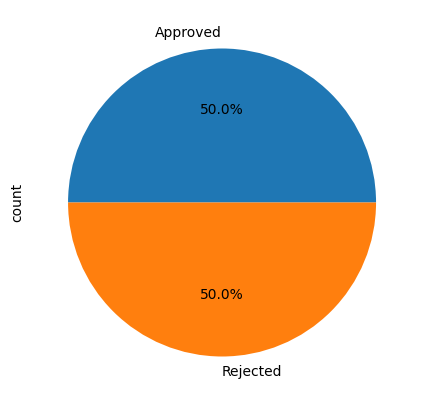

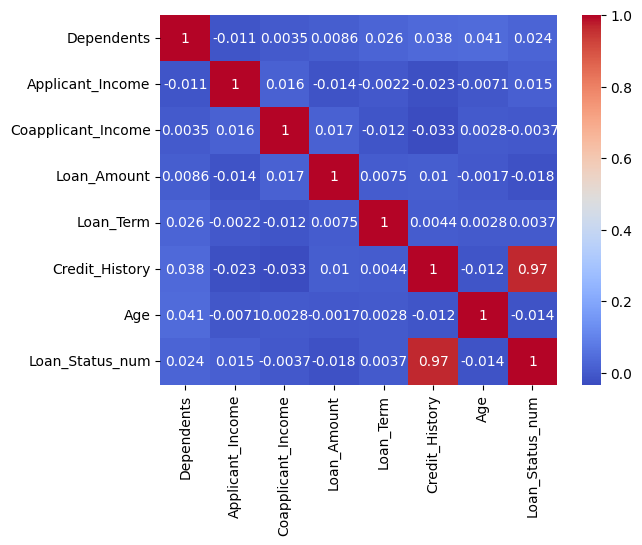

In [28]:
from sklearn.pipeline import Pipeline

# ================================
# TRAIN FINAL MODEL
# ================================
best_model = Pipeline([
    ('prep', preprocess),
    ('model', models[best_model_name])
])
best_model.fit(X_train, y_train)
print("Final model trained.")

# ================================
# SAVE FINAL MODEL
# ================================
joblib.dump(best_model, "loan_model.pkl")
print("Model saved")

# ================================
# PIE CHART
# ================================
df[target_col].value_counts().rename(
    {'Y':'Approved','N':'Rejected'}
).plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.show()

# ================================
# HEATMAP
# ================================
sns.heatmap(eda.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

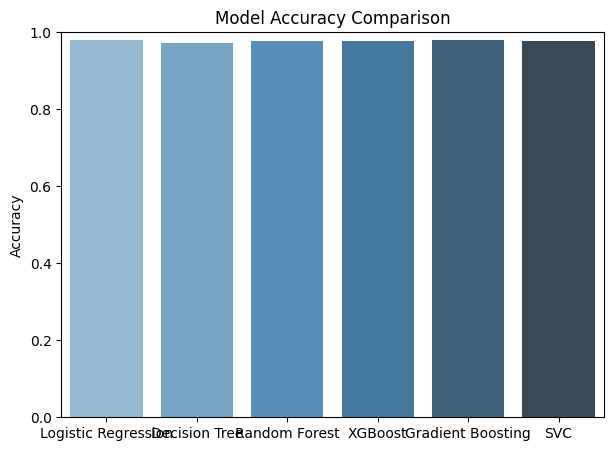

 Best Performing Model: Logistic Regression


In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), palette="Blues_d", legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

best_model_name = max(results, key=results.get)
print(f" Best Performing Model: {best_model_name}")


Logistic Regression Accuracy: 98.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.97      0.99      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



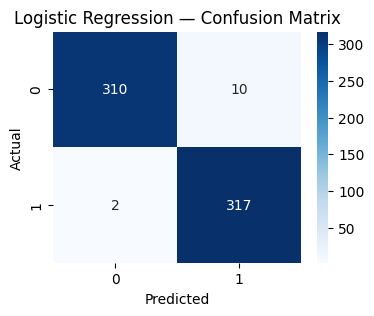


Decision Tree Accuracy: 97.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       0.96      0.98      0.97       319

    accuracy                           0.97       639
   macro avg       0.97      0.97      0.97       639
weighted avg       0.97      0.97      0.97       639



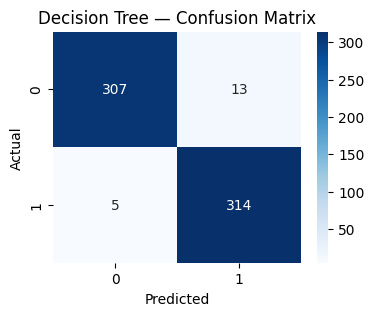


Random Forest Accuracy: 97.65%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       320
           1       0.96      1.00      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



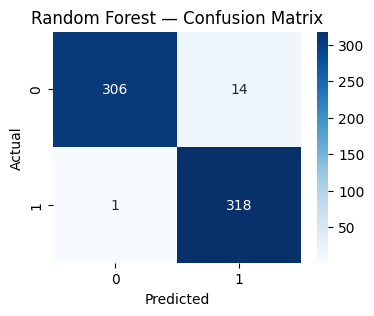


Best Model: Logistic Regression (98.12% Accuracy)


In [30]:
# ================================
#  MULTI-MODEL TRAINING + CONFUSION MATRIX
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}

results = {}

def evaluate(model, name):
    """Print accuracy, classification report & show confusion matrix."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} — Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train + Evaluate all models
for name, model in models.items():
    clf = Pipeline([('prep', preprocess), ('model', model)])
    clf.fit(X_train, y_train)

    # store accuracy
    acc = accuracy_score(y_test, clf.predict(X_test))
    results[name] = acc

    # full evaluation for each model
    evaluate(clf, name)

# Print best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} ({results[best_model_name]*100:.2f}% Accuracy)")

In [31]:
# LOAN APPROVAL PREDICTION SYSTEM
!pip install pandas numpy matplotlib seaborn scikit-learn gradio joblib xgboost -q


# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import joblib
import gradio as gr
import plotly.express as px
import ipywidgets as widgets
from google.colab import output
output.enable_custom_widget_manager()
from IPython.display import display
from xgboost import XGBClassifier
from sklearn.svm import SVC


Logistic Regression Accuracy: 98.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.97      0.99      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



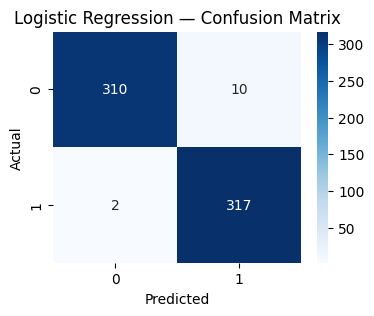


Decision Tree Accuracy: 97.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       0.96      0.98      0.97       319

    accuracy                           0.97       639
   macro avg       0.97      0.97      0.97       639
weighted avg       0.97      0.97      0.97       639



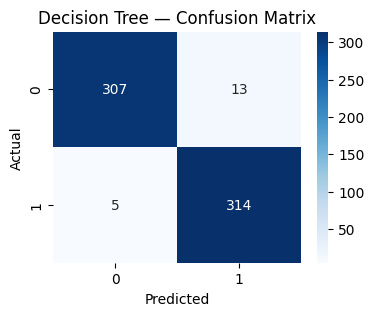


Random Forest Accuracy: 97.65%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       320
           1       0.96      1.00      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



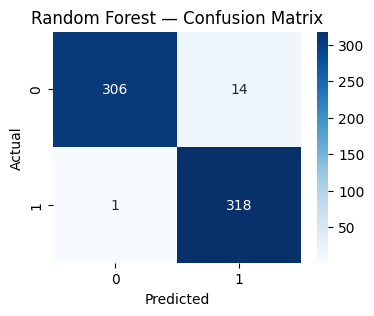

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:56:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 97.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       320
           1       0.97      0.98      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



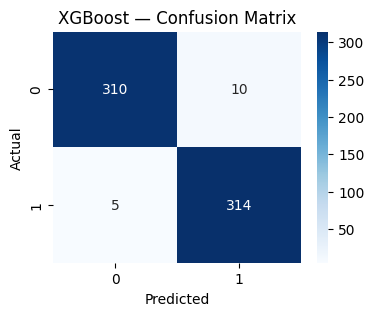


Gradient Boosting Accuracy: 98.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.97      0.99      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



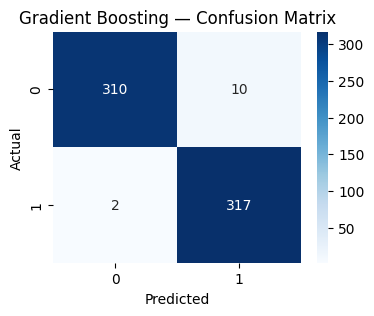


SVC Accuracy: 97.65%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       320
           1       0.96      1.00      0.98       319

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639



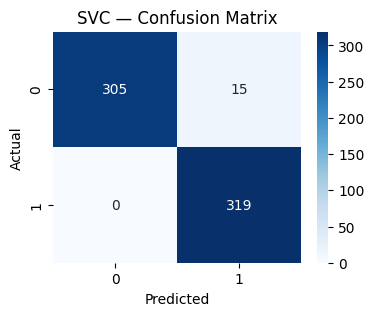


Best Model: Logistic Regression (98.12% Accuracy)


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# ================================
#  MULTI-MODEL TRAINING + CONFUSION MATRIX
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42)
}

results = {}

def evaluate(model, name):
    """Print accuracy, classification report & show confusion matrix."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} — Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train + Evaluate all models
for name, model in models.items():
    clf = Pipeline([('prep', preprocess), ('model', model)])
    clf.fit(X_train, y_train)

    # store accuracy
    acc = accuracy_score(y_test, clf.predict(X_test))
    results[name] = acc

    # full evaluation for each model
    evaluate(clf, name)

# Print best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} ({results[best_model_name]*100:.2f}% Accuracy)")


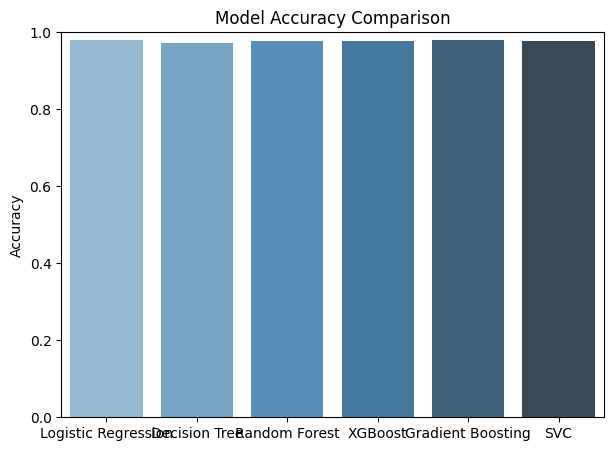

 Best Performing Model: Logistic Regression


In [33]:
plt.figure(figsize=(7,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), palette="Blues_d", legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

best_model_name = max(results, key=results.get)
print(f" Best Performing Model: {best_model_name}")

Final model trained.
Model saved


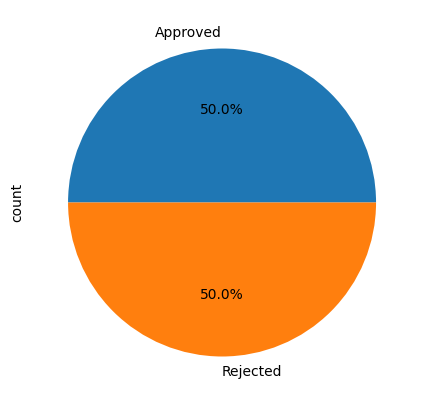

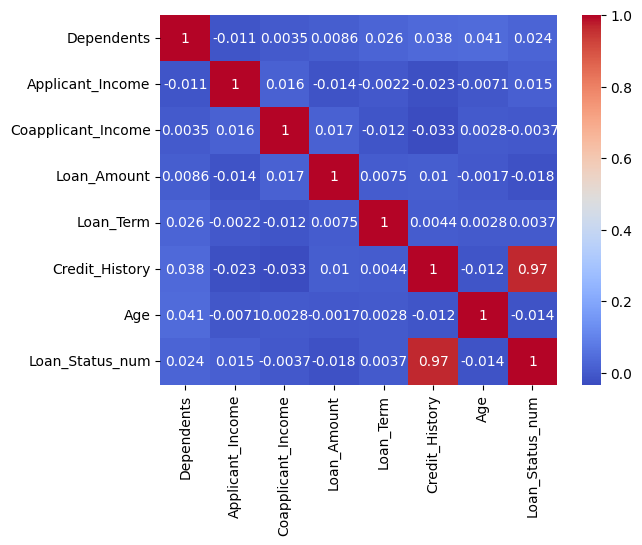

In [34]:
from sklearn.pipeline import Pipeline

# ================================
# TRAIN FINAL MODEL
# ================================
best_model = Pipeline([
    ('prep', preprocess),
    ('model', models[best_model_name])
])
best_model.fit(X_train, y_train)
print("Final model trained.")

# ================================
# SAVE FINAL MODEL
# ================================
joblib.dump(best_model, "loan_model.pkl")
print("Model saved")

# ================================
# PIE CHART
# ================================
df[target_col].value_counts().rename(
    {'Y':'Approved','N':'Rejected'}
).plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.show()

# ================================
# HEATMAP
# ================================
sns.heatmap(eda.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()